###  Search Terms: Hemolysis or blood damage and heart valve

In [71]:
## Import libraries
import csv
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import requests

In [72]:
# PubMed Website URL
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term=(%22Hemolysis%22%5Btiab%5D%20or%20%22blood%20damage%22%5Btiab%5D)%20AND%20%22Heart%20Valve%22%5Btiab%5D&filter=years.2015-2023'
response = requests.get(baseURL)
print(response)

<Response [200]>


In [73]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.55dd827ca

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=(%22Hemolysis%22%5Btiab%5D%20or%20%22blood%20damage%22%5Btiab%5D)%20AND%20%22Heart%20Valve%22%5Btiab%5D&filter=years.2015-2023'

# Create a list to hold all data
all_data = []

# Function to scrape a single page
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Failed to retrieve page: {page_url}")
        return

    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()

        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        cited_by_elem = article.find('ul', class_='articles-list')
        cited_by = cited_by_elem.text.strip() if cited_by_elem else ""

        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
            'Cited_by': cited_by
        })

# Scrape multiple pages
for page_num in range(1, 7):  # Adjust the range according to the number of pages to scrape
    url = f"{base_url}&page={page_num}"
    scrape_page(url)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

print(df)


                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Fetal Transcatheter Trileaflet Heart Valve Hem...   
4   Heart valve inspired and multi-stream aortic c...   
5   Decreased Hemolysis and Improved Hemodynamic P...   
6   Transcatheter valvular therapies in patients w...   
7   Hematologic Effects of Heart Valve Prostheses ...   
8   Development of Antithrombogenic ECM-Based Nano...   
9                Turbulence in blood damage modeling.   
10  Improved Hemocompatibility on Superhemophobic ...   
11  Aortic valve replacement in sheep with a novel...   
12  Experimental Assessment of Flow Fields Associa...   
13  Biofunctionalized Decellularized Tissue-Engine...   
14  Ramifications of Vorticity on Aggregation and ...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [75]:
num_articles = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles}")

The number of articles in the DataFrame is: 54


In [76]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,,
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,,
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,,
3,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,,
4,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,,
5,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,,
6,Transcatheter valvular therapies in patients w...,"Dagher O, Santaló-Corcoy M, Perrin N, Dorval J...",Front Cardiovasc Med. 2023 Mar 13;10:1071805. ...,PMID: 36993995,2023,,
7,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,,
8,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,,
9,Turbulence in blood damage modeling.,"Goubergrits L, Osman J, Mevert R, Kertzscher U...",Int J Artif Organs. 2016 Jun 15;39(4):160-5. d...,PMID: 27034315,2016,,


In [77]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [79]:
## Create the URL

baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl} + df.iloc[0:3]')
affiliations

<Response [404]>

In [80]:
## Create a list to get the affiliations_url
affiliations_url = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url.append(search_url)
affiliations_url

https://pubmed.ncbi.nlm.nih.gov/35498142
https://pubmed.ncbi.nlm.nih.gov/30073891
https://pubmed.ncbi.nlm.nih.gov/33958130
https://pubmed.ncbi.nlm.nih.gov/32052320
https://pubmed.ncbi.nlm.nih.gov/30916790
https://pubmed.ncbi.nlm.nih.gov/26897194
https://pubmed.ncbi.nlm.nih.gov/36993995
https://pubmed.ncbi.nlm.nih.gov/25703635
https://pubmed.ncbi.nlm.nih.gov/35839464
https://pubmed.ncbi.nlm.nih.gov/27034315
https://pubmed.ncbi.nlm.nih.gov/36671615
https://pubmed.ncbi.nlm.nih.gov/36003713
https://pubmed.ncbi.nlm.nih.gov/29532332
https://pubmed.ncbi.nlm.nih.gov/37508886
https://pubmed.ncbi.nlm.nih.gov/35079764
https://pubmed.ncbi.nlm.nih.gov/30223603
https://pubmed.ncbi.nlm.nih.gov/35415767
https://pubmed.ncbi.nlm.nih.gov/32597794
https://pubmed.ncbi.nlm.nih.gov/30209706
https://pubmed.ncbi.nlm.nih.gov/28482571
https://pubmed.ncbi.nlm.nih.gov/28009941
https://pubmed.ncbi.nlm.nih.gov/32709744
https://pubmed.ncbi.nlm.nih.gov/34482226
https://pubmed.ncbi.nlm.nih.gov/30198167
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/35498142',
 'https://pubmed.ncbi.nlm.nih.gov/30073891',
 'https://pubmed.ncbi.nlm.nih.gov/33958130',
 'https://pubmed.ncbi.nlm.nih.gov/32052320',
 'https://pubmed.ncbi.nlm.nih.gov/30916790',
 'https://pubmed.ncbi.nlm.nih.gov/26897194',
 'https://pubmed.ncbi.nlm.nih.gov/36993995',
 'https://pubmed.ncbi.nlm.nih.gov/25703635',
 'https://pubmed.ncbi.nlm.nih.gov/35839464',
 'https://pubmed.ncbi.nlm.nih.gov/27034315',
 'https://pubmed.ncbi.nlm.nih.gov/36671615',
 'https://pubmed.ncbi.nlm.nih.gov/36003713',
 'https://pubmed.ncbi.nlm.nih.gov/29532332',
 'https://pubmed.ncbi.nlm.nih.gov/37508886',
 'https://pubmed.ncbi.nlm.nih.gov/35079764',
 'https://pubmed.ncbi.nlm.nih.gov/30223603',
 'https://pubmed.ncbi.nlm.nih.gov/35415767',
 'https://pubmed.ncbi.nlm.nih.gov/32597794',
 'https://pubmed.ncbi.nlm.nih.gov/30209706',
 'https://pubmed.ncbi.nlm.nih.gov/28482571',
 'https://pubmed.ncbi.nlm.nih.gov/28009941',
 'https://pubmed.ncbi.nlm.nih.gov/32709744',
 'https://

In [81]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Print the list of PMIDs
print(pmids_list)

['PMID: 35498142', 'PMID: 30073891', 'PMID: 33958130', 'PMID: 32052320', 'PMID: 30916790', 'PMID: 26897194', 'PMID: 36993995', 'PMID: 25703635', 'PMID: 35839464', 'PMID: 27034315', 'PMID: 36671615', 'PMID: 36003713', 'PMID: 29532332', 'PMID: 37508886', 'PMID: 35079764', 'PMID: 30223603', 'PMID: 35415767', 'PMID: 32597794', 'PMID: 30209706', 'PMID: 28482571', 'PMID: 28009941', 'PMID: 32709744', 'PMID: 34482226', 'PMID: 30198167', 'PMID: 30356059', 'PMID: 26919564', 'PMID: 30678950', 'PMID: 28209171', 'PMID: 32957201', 'PMID: 31696657', 'PMID: 37722839', 'PMID: 30731191', 'PMID: 26291041', 'PMID: 25587891', 'PMID: 29302952', 'PMID: 31060188', 'PMID: 33333728', 'PMID: 25940415', 'PMID: 26737004', 'PMID: 28800323', 'PMID: 26577368', 'PMID: 31912432', 'PMID: 36731379', 'PMID: 25691396', 'PMID: 36966654', 'PMID: 33415049', 'PMID: 27445504', 'PMID: 28914661', 'PMID: 24887937', 'PMID: 26504437', 'PMID: 27521817', 'PMID: 34917959', 'PMID: 35651449', 'PMID: 32877137']


In [82]:
import requests
from bs4 import BeautifulSoup

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# Initialize empty lists to store all affiliations and cited_by
affiliations_list = []
cited_by_list = []

# DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Loop through each pmid in the pmids_list
for pmid in pmids_list:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'

    # Send a GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the ul element with class "item-list" for affiliations
        ul_element = soup.find('ul', class_='item-list')

        # Extract and process the affiliations
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')

            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list.append(affiliations)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list.append(affiliation_element.text.strip())
            else:
                affiliations_list.append("No affiliations found")

        # Find the ul element with class "articles-list" for cited_by
        articles_list_element = soup.find('ul', class_='articles-list')

        # Extract and process the cited_by
        if articles_list_element:
            articles = articles_list_element.find_all('li')
            cited_by = ", ".join([article.text for article in articles])
            if cited_by.strip():
                cited_by_list.append(cited_by)
        else:
            cited_by_list.append("No cited by information found")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Print all the extracted affiliations
for affiliation in affiliations_list:
    print(affiliation)

# Print all the extracted cited_by
for cited_by in cited_by_list:
    print(cited_by)


1 Faculty of Engineering, Universiti Putra Malaysia, Serdang, Selangor 43400, Malaysia., 2 Faculty of Medicine and Health Sciences, Universiti Putra Malaysia, Serdang, Selangor 43400, Malaysia., 3 Graduate School of Life Science and Systems Engineering, Kyushu Institute of Technology, Kitakyushu, Fukuoka 804-8550, Japan.
1 Institute for Computational and Imaging Science in Cardiovascular Medicine, Charité - Universitätsmedizin Berlin, Berlin, Germany.
1 Department of Cardiac Surgery, Niguarda Hospital, Milan, Italy. Electronic address: aldo.cannata@ospedaleniguarda.it., 2 Department of Hematology, Niguarda Hospital, Milan, Italy., 3 Department of Cardiac Surgery, Niguarda Hospital, Milan, Italy.
1 The Wallace H. Coulter Department of Biomedical Engineering, Georgia Institute of Technology, 387 Technology Circle NW, Atlanta, GA, 30313, USA., 2 Center for Regenerative Medicine, Tissue Engineering Program, The Research Institute at Nationwide Children's Hospital, Columbus, OH, USA., 3 Cas

In [83]:
import pandas as pd

# Make sure the length of the lists matches the length of df['PMID']
if len(affiliations_list) == len(df) and len(cited_by_list) == len(df):
    # Add the affiliations_list and cited_by_list as new columns to the DataFrame
    df['Affiliations'] = affiliations_list
    df['Cited_By'] = cited_by_list
else:
    print("Lengths of the lists do not match the length of the DataFrame.")

# Display the updated DataFrame with new columns
print(df)


                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Fetal Transcatheter Trileaflet Heart Valve Hem...   
4   Heart valve inspired and multi-stream aortic c...   
5   Decreased Hemolysis and Improved Hemodynamic P...   
6   Transcatheter valvular therapies in patients w...   
7   Hematologic Effects of Heart Valve Prostheses ...   
8   Development of Antithrombogenic ECM-Based Nano...   
9                Turbulence in blood damage modeling.   
10  Improved Hemocompatibility on Superhemophobic ...   
11  Aortic valve replacement in sheep with a novel...   
12  Experimental Assessment of Flow Fields Associa...   
13  Biofunctionalized Decellularized Tissue-Engine...   
14  Ramifications of Vorticity on Aggregation and ...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [84]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by,Cited_By
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,"1 Faculty of Engineering, Universiti Putra Mal...",,\n\n\n \n Hemodynamic Effects of S...
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,1 Institute for Computational and Imaging Scie...,,\n\n\n \n On Eulerian versus Lagra...
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,"1 Department of Cardiac Surgery, Niguarda Hosp...",,\n\n\n \n Intractable mechanical h...
3,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,1 The Wallace H. Coulter Department of Biomedi...,,\n\n\n \n Flow dynamics of surgica...
4,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,"1 Department of Mechanical Engineering, Koç Un...",,\n\n\n \n Characterization of neon...
5,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,1 Department of Mechanical & Mechatronic Engin...,,\n\n\n \n The St Jude Medical Trif...
6,Transcatheter valvular therapies in patients w...,"Dagher O, Santaló-Corcoy M, Perrin N, Dorval J...",Front Cardiovasc Med. 2023 Mar 13;10:1071805. ...,PMID: 36993995,2023,"1 Department of Surgery, Montreal Heart Instit...",,\n\n\n \n Continuous-Flow Left Ven...
7,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,"1 Department of Thoracic, and Cardiovascular S...",,\n\n\n \n Modification of the Ross...
8,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,"1 Nanotechnology and Nanomedicine Division, In...",,\n\n\n \n Structural assessments i...
9,Turbulence in blood damage modeling.,"Goubergrits L, Osman J, Mevert R, Kertzscher U...",Int J Artif Organs. 2016 Jun 15;39(4):160-5. d...,PMID: 27034315,2016,"1 Biofluid Mechanics Laboratory, Charité Medic...",,\n\n\n \n The effect of turbulent ...


In [85]:
# Assuming df is your DataFrame

# Drop the 'Cited_by' column
df.drop(columns='Cited_by', inplace=True)

# Display the updated DataFrame
print(df)

                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Fetal Transcatheter Trileaflet Heart Valve Hem...   
4   Heart valve inspired and multi-stream aortic c...   
5   Decreased Hemolysis and Improved Hemodynamic P...   
6   Transcatheter valvular therapies in patients w...   
7   Hematologic Effects of Heart Valve Prostheses ...   
8   Development of Antithrombogenic ECM-Based Nano...   
9                Turbulence in blood damage modeling.   
10  Improved Hemocompatibility on Superhemophobic ...   
11  Aortic valve replacement in sheep with a novel...   
12  Experimental Assessment of Flow Fields Associa...   
13  Biofunctionalized Decellularized Tissue-Engine...   
14  Ramifications of Vorticity on Aggregation and ...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [86]:
# Clean up the 'Cited_By' column by stripping newline and excess whitespace characters
df['Cited_By'] = df['Cited_By'].apply(lambda x: x.strip())

# Display the updated DataFrame
print(df)


                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Fetal Transcatheter Trileaflet Heart Valve Hem...   
4   Heart valve inspired and multi-stream aortic c...   
5   Decreased Hemolysis and Improved Hemodynamic P...   
6   Transcatheter valvular therapies in patients w...   
7   Hematologic Effects of Heart Valve Prostheses ...   
8   Development of Antithrombogenic ECM-Based Nano...   
9                Turbulence in blood damage modeling.   
10  Improved Hemocompatibility on Superhemophobic ...   
11  Aortic valve replacement in sheep with a novel...   
12  Experimental Assessment of Flow Fields Associa...   
13  Biofunctionalized Decellularized Tissue-Engine...   
14  Ramifications of Vorticity on Aggregation and ...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [130]:
# Specify the full path
file_path=r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\Hemolysis_HVdata.csv'
# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)

### Analysis

The dataset contains the following columns:

Title: Title of the publication.
Authors: List of authors.
Journal: Journal information.
PMID: PubMed ID.
Publication_year: Year of publication.
Affiliations: Affiliations of the authors.
Cited_By: Information about other works that cited this publication.

### Data Cleaning Steps:

Handling Missing Data: Check for missing values.
Removing Duplicates: Ensure no duplicate rows.
Formatting Columns: Ensure columns are in the correct format.
Cleaning Text Data: Clean text data by removing extra spaces, converting to lowercase, etc.
Renaming Columns: Rename columns for clarity and consistency.
Removing Unnecessary Columns: Drop columns that are not needed.
Handling Categorical Data: Convert categorical data into a format suitable for analysis.

In [132]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\Hemolysis_HVdata.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  simulation of mechanical heart valve dysfuncti...   
1  past and future of blood damage modelling in a...   
2  mechanical hemolysis complicating transcathete...   
3  fetal transcatheter trileaflet heart valve hem...   
4  heart valve inspired and multi-stream aortic c...   

                                             Authors  \
0  chen a, basri aab, ismail nb, tamagawa m, zhu ...   
1             goubergrits l, kertzscher u, lommel m.   
2  cannata a, cantoni s, sciortino a, bruschi g, ...   
3  hatoum h, gooden s, heitkemper m, blum km, zak...   
4                               rasooli r, pekkan k.   

                                             Journal            PMID  \
0  appl bionics biomech. 2022 apr 19;2022:9612296...  PMID: 35498142   
1  int j artif organs. 2019 mar;42(3):125-132. do...  PMID: 30073891   
2  j am coll cardiol. 2021 may 11;77(18):2323-233...  PMID: 33958130   
3  ann biomed eng. 2020 jun;48(6):1683

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             54 non-null     object
 1   Authors           54 non-null     object
 2   Journal           54 non-null     object
 3   PMID              54 non-null     object
 4   Publication_year  54 non-null     int64 
 5   Affiliations      54 non-null     object
 6   Cited_By          54 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.1+ KB


In [134]:
df.describe()

,Publication_year
count,54.000000
mean,2018.759259
std,2.670137
min,2015.000000
25%,2016.000000
50%,2019.000000
75%,2021.000000
max,2023.000000


In [135]:
# Check for missing values
print(df.isnull().sum())

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
Cited_By            0
dtype: int64


In [136]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [108]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,"1 Faculty of Engineering, Universiti Putra Mal...",Hemodynamic Effects of Subaortic Stenosis on B...
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,1 Institute for Computational and Imaging Scie...,On Eulerian versus Lagrangian models of mechan...
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,"1 Department of Cardiac Surgery, Niguarda Hosp...",Intractable mechanical hemolytic anemia compli...
3,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,1 The Wallace H. Coulter Department of Biomedi...,Flow dynamics of surgical and transcatheter ao...
4,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,"1 Department of Mechanical Engineering, Koç Un...",Characterization of neonatal aortic cannula je...
5,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,1 Department of Mechanical & Mechatronic Engin...,The St Jude Medical Trifecta aortic pericardia...
6,Transcatheter valvular therapies in patients w...,"Dagher O, Santaló-Corcoy M, Perrin N, Dorval J...",Front Cardiovasc Med. 2023 Mar 13;10:1071805. ...,PMID: 36993995,2023,"1 Department of Surgery, Montreal Heart Instit...",Continuous-Flow Left Ventricular Assist Device...
7,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,"1 Department of Thoracic, and Cardiovascular S...",Modification of the Ross aortic valve replacem...
8,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,"1 Nanotechnology and Nanomedicine Division, In...",Structural assessments in decellularized extra...
9,Turbulence in blood damage modeling.,"Goubergrits L, Osman J, Mevert R, Kertzscher U...",Int J Artif Organs. 2016 Jun 15;39(4):160-5. d...,PMID: 27034315,2016,"1 Biofluid Mechanics Laboratory, Charité Medic...",The effect of turbulent viscous shear stress o...


In [137]:
# Clean text data by removing extra spaces and converting to lowercase
df['Title'] = df['Title'].str.strip().str.lower()
df['Authors'] = df['Authors'].str.strip().str.lower()
df['Journal'] = df['Journal'].str.strip().str.lower()
df['Affiliations'] = df['Affiliations'].str.strip().str.lower()
df['Cited_By'] = df['Cited_By'].str.strip().str.lower()

In [139]:
# Check for missing values
missing_values = df.isnull().sum()

In [140]:
# Display missing values and the first few rows of the cleaned dataset
print(missing_values)
df.head()

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
Cited_By            0
dtype: int64


,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
0,simulation of mechanical heart valve dysfuncti...,"chen a, basri aab, ismail nb, tamagawa m, zhu ...",appl bionics biomech. 2022 apr 19;2022:9612296...,PMID: 35498142,2022,"1 faculty of engineering, universiti putra mal...",hemodynamic effects of subaortic stenosis on b...
1,past and future of blood damage modelling in a...,"goubergrits l, kertzscher u, lommel m.",int j artif organs. 2019 mar;42(3):125-132. do...,PMID: 30073891,2019,1 institute for computational and imaging scie...,on eulerian versus lagrangian models of mechan...
2,mechanical hemolysis complicating transcathete...,"cannata a, cantoni s, sciortino a, bruschi g, ...",j am coll cardiol. 2021 may 11;77(18):2323-233...,PMID: 33958130,2021,"1 department of cardiac surgery, niguarda hosp...",intractable mechanical hemolytic anemia compli...
3,fetal transcatheter trileaflet heart valve hem...,"hatoum h, gooden s, heitkemper m, blum km, zak...",ann biomed eng. 2020 jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,1 the wallace h. coulter department of biomedi...,flow dynamics of surgical and transcatheter ao...
4,heart valve inspired and multi-stream aortic c...,"rasooli r, pekkan k.",artif organs. 2019 oct;43(10):e233-e248. doi: ...,PMID: 30916790,2019,"1 department of mechanical engineering, koç un...",characterization of neonatal aortic cannula je...


In [141]:
# Filter out rows where 'Affiliations' column contains "no affiliations found"
df_with_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Display the rows of the dataset with no affiliations
df_with_no_affiliations


,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
32,high-resolution measurements of velocity and s...,"klusak e, bellofiore a, loughnane s, quinlan nj.",j biomech eng. 2015 nov;137(11):111008. doi: 1...,PMID: 26291041,2015,no affiliations found,an in vitro investigation of the retrograde fl...
33,design of a pulsatile flow facility to evaluat...,"arjunon s, ardana ph, saikrishnan n, madhani s...",j biomech eng. 2015 apr;137(4):045001. doi: 10...,PMID: 25587891,2015,no affiliations found,time-resolved piv technique for high temporal ...
38,3d velocity field characterization of prosthet...,"d'avenio g, grigioni m, daniele c, morbiducci ...",annu int conf ieee eng med biol soc. 2015;2015...,PMID: 26737004,2015,no affiliations found,dynamic particle image velocimetry study of th...
49,combined retrograde/antegrade approach to tran...,"damluji aa, kaynak he, heldman aw.",tex heart inst j. 2015 oct 1;42(5):443-7. doi:...,PMID: 26504437,2015,no affiliations found,management of paravalvular regurgitation after...


In [142]:
# Filter out rows where 'Affiliations' column contains "no affiliations found"
df_with_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Count the number of publications that have the phrase "no affiliations found" in the 'Affiliations' column
num_publications_no_affiliations = df_with_no_affiliations.shape[0]

num_publications_no_affiliations


4

### Author Analysis

In [148]:
# Checking the data type of 'data'
df_type = type(df)

# Checking the columns of 'data'
data_columns = df.columns

df_type, data_columns

(pandas.core.frame.DataFrame,
 Index(['Title', 'Authors', 'Journal', 'PMID', 'Publication_year',
        'Affiliations', 'Cited_By'],
       dtype='object'))

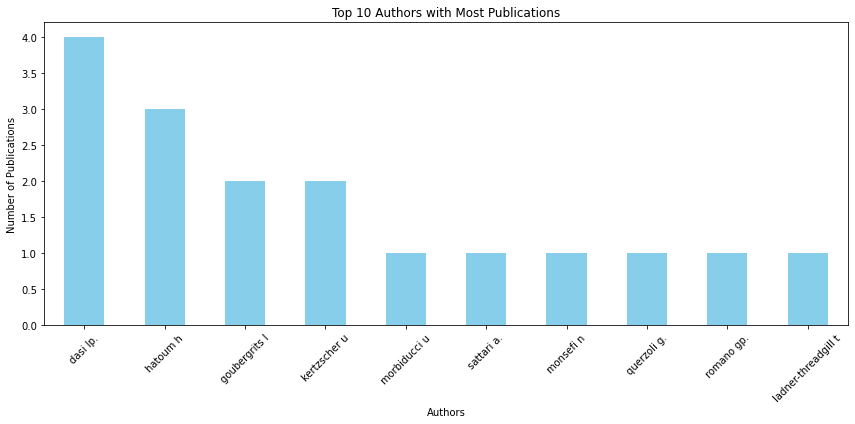

In [155]:
# Most frequent authors
all_authors = df['Authors'].str.split(',').explode().str.strip()
author_counts = all_authors.value_counts()
top_10_authors = author_counts.head(10)
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar', color='skyblue')
plt.title("Top 10 Authors with Most Publications")
plt.ylabel("Number of Publications")
plt.xlabel("Authors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Citation Analysis

In [157]:
# Counting the occurrences of each cited work
cited_works = df['Cited_By'].str.split(',').tolist()
all_cited_works = list(itertools.chain.from_iterable(cited_works))

# Extract only the author names (assuming they are the first part of the entries)
extracted_authors = [work.split('.')[0].strip() for work in all_cited_works if work.strip().lower() not in ['n/n/n', '']]

cited_work_counts = Counter(extracted_authors)

# Most cited authors
most_cited_authors = cited_work_counts.most_common(10)

print(most_cited_authors)

[('et al', 250), ('yoganathan ap', 12), ('dasi lp', 12), ('saikrishnan n', 9), ('steinseifer u', 7), ('experimental assessment of flow fields associated with heart valve prostheses using particle image velocimetry (piv): recommendations for best practices', 7), ('sastry s', 7), ('popat kc', 5), ('tarbell jm', 4), ('bluestein d', 4)]


<ipython-input-159-ba3d918b99c0>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


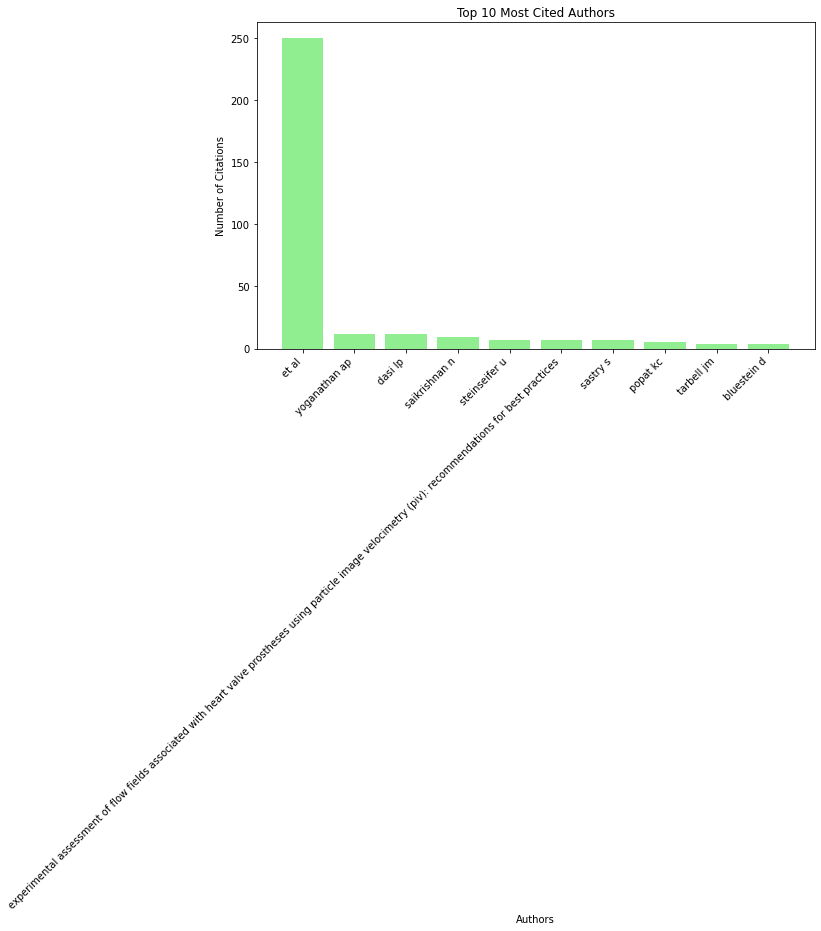

In [159]:
import matplotlib.pyplot as plt

# 'most_cited_authors' is the result from the previous code
most_cited_authors = cited_work_counts.most_common(10)

# Extracting author names and citation counts
author_names = [author[0] for author in most_cited_authors]
citation_counts = [author[1] for author in most_cited_authors]

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(author_names, citation_counts, color='lightgreen')
plt.xlabel('Authors')
plt.ylabel('Number of Citations')
plt.title('Top 10 Most Cited Authors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

### Collaboration Analysis

In [160]:
# Creating a dictionary to store collaboration pairs and their counts
collaboration_counts = {}

for authors in author_lists:
    # Creating unique pairs of authors for each publication
    for pair in itertools.combinations(authors, 2):
        # Sorting the pair to avoid duplicates (e.g., A-B and B-A)
        sorted_pair = tuple(sorted(pair))
        # Counting collaborations
        collaboration_counts[sorted_pair] = collaboration_counts.get(sorted_pair, 0) + 1

# Most common collaborations
most_common_collaborations = Counter(collaboration_counts).most_common(10)

most_common_collaborations


[((' dasi lp.', 'hatoum h'), 3),
 ((' kertzscher u', 'goubergrits l'), 2),
 ((' basri aab', 'chen a'), 1),
 ((' ismail nb', 'chen a'), 1),
 ((' tamagawa m', 'chen a'), 1),
 ((' zhu d', 'chen a'), 1),
 ((' ahmad ka.', 'chen a'), 1),
 ((' basri aab', ' ismail nb'), 1),
 ((' basri aab', ' tamagawa m'), 1),
 ((' basri aab', ' zhu d'), 1)]

The most common collaborations among authors are as follows:

Dasi LP. and Hatoum H have collaborated 3 times.
Kertzscher U and Goubergrits L have collaborated 2 times.
Several other pairs have collaborated once.

In [172]:
# Counting the occurrences of each journal
journal_counts = Counter(df['Journal'])

# Most common journals
most_common_journals = journal_counts.most_common(10)

most_common_journals

[('appl bionics biomech. 2022 apr 19;2022:9612296. doi: 10.1155/2022/9612296. ecollection 2022.',
  1),
 ('int j artif organs. 2019 mar;42(3):125-132. doi: 10.1177/0391398818790343. epub 2018 aug 3.',
  1),
 ('j am coll cardiol. 2021 may 11;77(18):2323-2334. doi: 10.1016/j.jacc.2021.03.295.',
  1),
 ('ann biomed eng. 2020 jun;48(6):1683-1693. doi: 10.1007/s10439-020-02475-3. epub 2020 feb 12.',
  1),
 ('artif organs. 2019 oct;43(10):e233-e248. doi: 10.1111/aor.13462. epub 2019 apr 29.',
  1),
 ('ann thorac surg. 2016 mar;101(3):1153-8. doi: 10.1016/j.athoracsur.2015.10.111.',
  1),
 ('front cardiovasc med. 2023 mar 13;10:1071805. doi: 10.3389/fcvm.2023.1071805. ecollection 2023.',
  1),
 ('thorac cardiovasc surg. 2015 sep;63(6):452-8. doi: 10.1055/s-0035-1544183. epub 2015 feb 17.',
  1),
 ('acs appl bio mater. 2022 aug 15;5(8):3883-3895. doi: 10.1021/acsabm.2c00423. epub 2022 jul 15.',
  1),
 ('int j artif organs. 2016 jun 15;39(4):160-5. doi: 10.5301/ijao.5000476. epub 2016 mar 30.',

In [169]:
# Dataset with affiliations
df_with_affiliations = df[~df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Dataset without affiliations
df_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

<ipython-input-170-c0d708307452>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


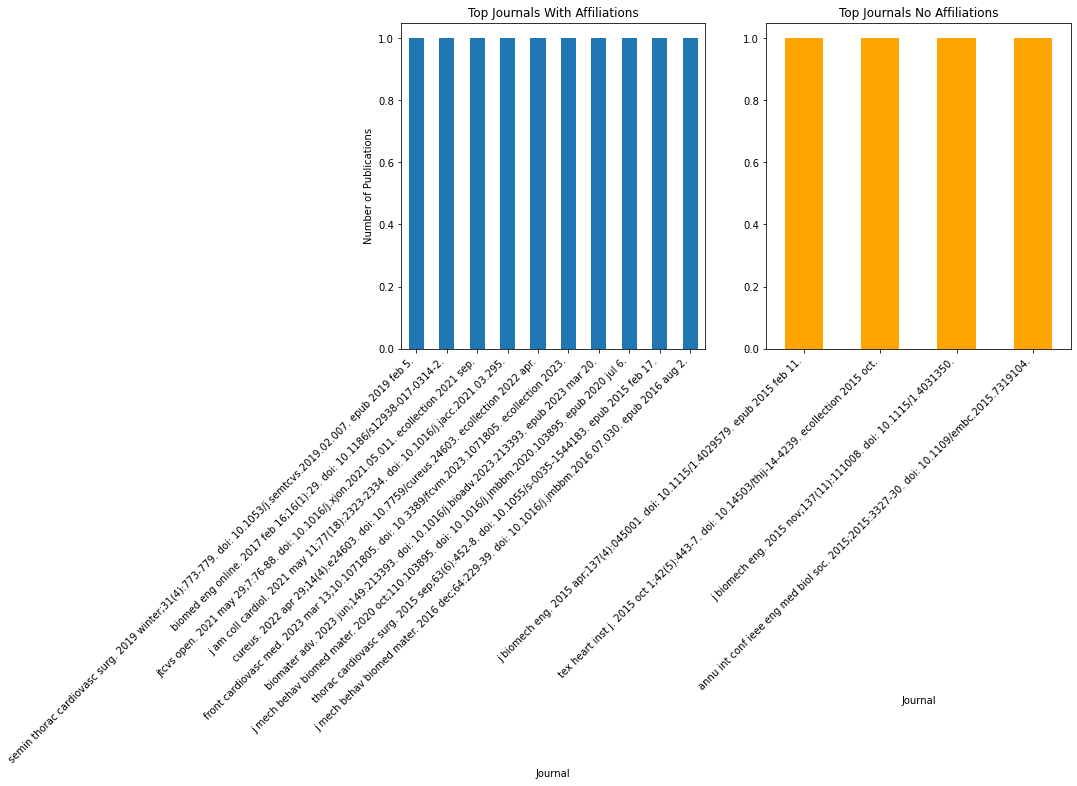

In [170]:
# Group by journal and count publications for each subset
journal_freq_with_affiliations = df_with_affiliations['Journal'].value_counts().head(10)
journal_freq_no_affiliations = df_no_affiliations['Journal'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
journal_freq_with_affiliations.plot(kind='bar')
plt.title('Top Journals With Affiliations')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
journal_freq_no_affiliations.plot(kind='bar', color='orange')
plt.title('Top Journals No Affiliations')
plt.xlabel('Journal')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<ipython-input-171-adbcc549a4d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
<ipython-input-171-adbcc549a4d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')


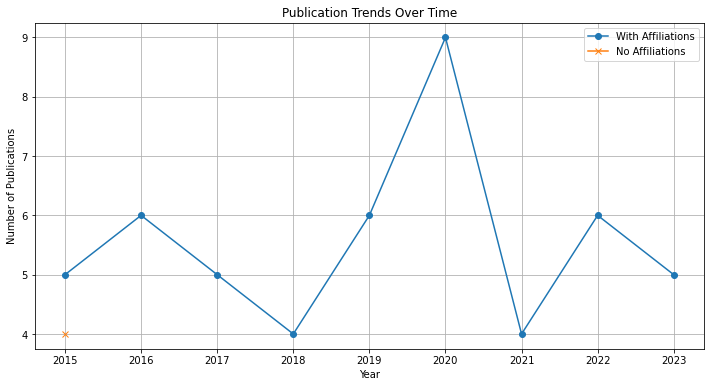

In [171]:
# Separate the dataset into two subsets
df_with_affiliations = df[~df['Affiliations'].str.lower().str.contains('no affiliations found')]
df_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Convert 'Publication_year' to numeric
df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')

# Group by publication year and count publications
pub_trends_with_affiliations = df_with_affiliations.groupby('Publication_year').size()
pub_trends_no_affiliations = df_no_affiliations.groupby('Publication_year').size()

# Plotting
plt.figure(figsize=(12, 6))
pub_trends_with_affiliations.plot(label='With Affiliations', marker='o')
pub_trends_no_affiliations.plot(label='No Affiliations', marker='x')
plt.title('Publication Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()
